### This notebook is for the offline setup of the robot. 
This includes:

1. Camera distorsion matrices
2. Camera Variance calculation for x,y,theta

1. Camera distorsion

2. Camera Variance calculation for x,y,theta

In [ ]:
%reload_ext autoreload
%autoreload 2
from libs.vision import *
import cv2
import numpy as np
sigma = 5
epsilon = 0.01
n_steps=500
Thymio_hist=np.ones((3,n_steps,3))

cv2.destroyAllWindows()
print("Try to open camera")

cam = cv2.VideoCapture(1,cv2.CAP_DSHOW)

if not cam.isOpened(): 
    print("Camera could not be opened") 
    cam.release()
    exit()

#camera warmup for white balance
for _ in range(50):  
    ret, frame = cam.read()
    if not ret:
        print("Failed to capture frame")
        break

#get corners for perspective correction
image = get_image_from_camera(cam,False) # camera calibration inside
image,mat_persp,max_width_persp, max_height_persp,size_aruco = correct_perspective(image, sigma=sigma, epsilon=epsilon,get_matrix=True,aruco=True)
cv2.imshow("Image",image)
cv2.waitKey(1000)
print(size_aruco)


Try to open camera
34.103954


: 

In [2]:
import time
start=time.time()
for steps in range(n_steps):
    image = get_image_from_camera(cam,False) # camera calibration inside

    image,_,_,_,_ = correct_perspective(image, sigma=sigma, epsilon=epsilon,M=mat_persp,max_width_perspective=max_width_persp, max_height_perspective=max_height_persp,get_matrix=False)
    
    Thymio_xytheta, Thymio_detected=Thymio_position_aruco(image)
    if not Thymio_detected:
        cv2.imshow("Thymio not detected",image)
        cv2.waitKey(5000)
        cam.release()
        cv2.destroyAllWindows()
        raise ValueError("Thymio not detected")

    Thymio_hist[0,steps,:]=Thymio_xytheta
    print(f"{time.time()-start} ms")
    start=time.time()

0.008485794067382812 ms
0.008067131042480469 ms
0.045403242111206055 ms
0.029288530349731445 ms
0.03321433067321777 ms
0.03129982948303223 ms
0.03768491744995117 ms
0.03357529640197754 ms
0.03268289566040039 ms
0.029989004135131836 ms
0.03260469436645508 ms
0.036128997802734375 ms
0.022313356399536133 ms
0.041912078857421875 ms
0.03889203071594238 ms
0.03759622573852539 ms
0.020776748657226562 ms
0.042298078536987305 ms
0.027909040451049805 ms
0.031351327896118164 ms
0.031147003173828125 ms
0.039346933364868164 ms
0.030487537384033203 ms
0.03401303291320801 ms
0.030780792236328125 ms
0.025416851043701172 ms
0.05066847801208496 ms
0.03498554229736328 ms
0.030447959899902344 ms
0.031019210815429688 ms
0.03310441970825195 ms
0.025147438049316406 ms
0.03823065757751465 ms
0.031705617904663086 ms
0.03283834457397461 ms
0.03181028366088867 ms
0.03295135498046875 ms
0.029899120330810547 ms
0.04975080490112305 ms
0.02354598045349121 ms
0.030913114547729492 ms
0.036348581314086914 ms
0.02731347

In [4]:
for steps in range(n_steps):
    image = get_image_from_camera(cam,False) # camera calibration inside

    image,_,_,_,_ = correct_perspective(image, sigma=sigma, epsilon=epsilon,M=mat_persp,max_width_perspective=max_width_persp, max_height_perspective=max_height_persp,get_matrix=False)
    
    Thymio_xytheta, Thymio_detected=Thymio_position_aruco(image)
    if not Thymio_detected:
        cv2.imshow("Thymio not detected",image)
        cv2.waitKey(5000)
        cam.release()
        cv2.destroyAllWindows()
        raise ValueError("Thymio not detected")

    Thymio_hist[1,steps,:]=Thymio_xytheta
    print(f"{steps+1} done")

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123 done
1

In [9]:
for steps in range(n_steps):
    image = get_image_from_camera(cam,False) # camera calibration inside

    image,_,_,_,_ = correct_perspective(image, sigma=sigma, epsilon=epsilon,M=mat_persp,max_width_perspective=max_width_persp, max_height_perspective=max_height_persp,get_matrix=False)
    
    Thymio_xytheta, Thymio_detected=Thymio_position_aruco(image)
    if not Thymio_detected:
        cv2.imshow("Thymio not detected",image)
        cv2.waitKey(5000)
        cam.release()
        cv2.destroyAllWindows()
        raise ValueError("Thymio not detected")

    Thymio_hist[2,steps,:]=Thymio_xytheta
    print(f"{steps+1} done")

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123 done
1

In [7]:
print(np.mean(Thymio_hist[1,:,2])*180/np.pi)

-89.70496410946755


[0.00619125 0.0586945  0.00164873]


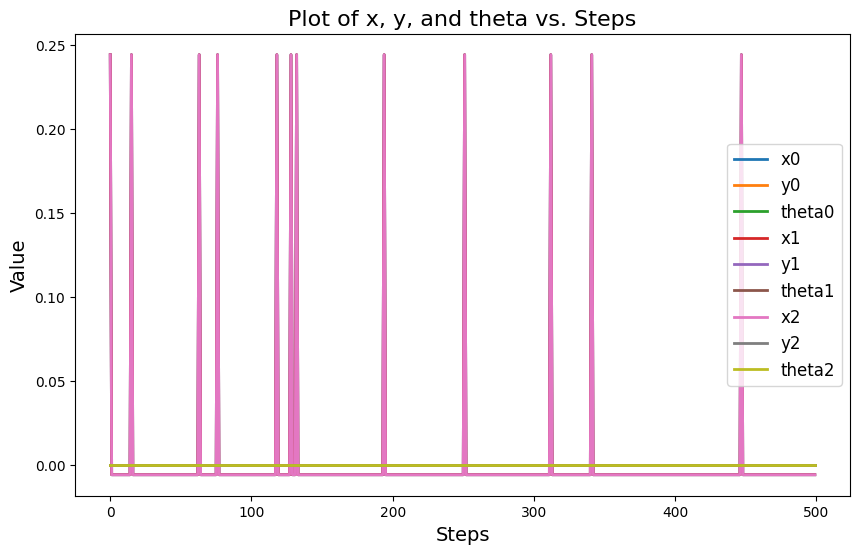

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(range(n_steps), Thymio_hist[0,:,0]-np.mean(Thymio_hist[0,:,0]), label=f'x{i}', linewidth=2)
    plt.plot(range(n_steps), Thymio_hist[0,:,1]-np.mean(Thymio_hist[0,:,1]), label=f'y{i}', linewidth=2)
    plt.plot(range(n_steps), Thymio_hist[0,:,2]-np.mean(Thymio_hist[0,:,2]), label=f'theta{i}', linewidth=2)

# Add labels and title
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Plot of x, y, and theta vs. Steps', fontsize=16)

# Add legend
plt.legend(fontsize=12)
print(np.var((Thymio_hist-np.mean(Thymio_hist,axis=1,keepdims=True)).reshape(-1,3),axis=0))

In [15]:
cam.release()
cv2.destroyAllWindows()